# Frequency time series split
Example of frequency-based time-series split

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.frequency_time_series_split import FrequencyTimeSeriesSplit

<Axes: >

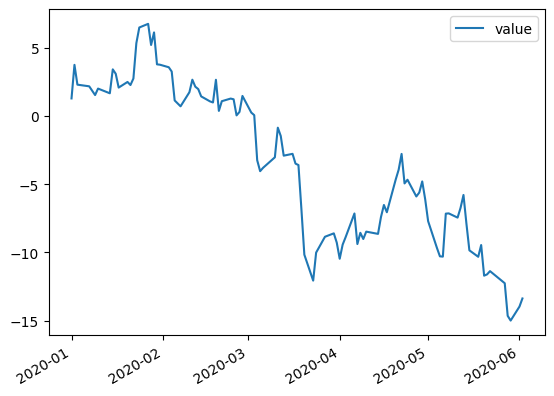

In [2]:
rng = np.random.default_rng()
size = 100
index = pd.date_range(start='2020-01-01', periods=int(size*1.1), freq='B')
index = pd.to_datetime(sorted(rng.choice(index, size, replace=False)))

X = pd.DataFrame({'value': rng.standard_t(4, size).cumsum()}, index=index)
assert X.index.is_monotonic_increasing
X.plot()

/var/folders/nb/97d8_vd55b7dqy0cy2fd1p5c0000gn/T/ipykernel_79944/20659705.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


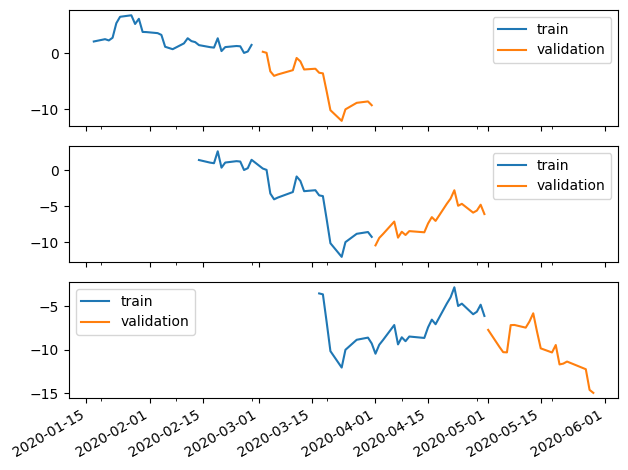

In [5]:
ftss = FrequencyTimeSeriesSplit(train_freq='MS', max_train_size=30)

folds = list()
for idx_train, idx_val in ftss.split(X):

    train = X.iloc[idx_train]
    validation = X.iloc[idx_val]

    data = pd.concat({'train': train, 'validation': validation}, axis=1)
    data.columns = data.columns.droplevel(1)
    folds.append(data)

fig, axes = plt.subplots(len(folds), 1, sharex=True)
for (data, ax) in zip(folds, axes):
    data.plot(ax=ax)

fig.tight_layout()
fig.show()